# **시각화 도구 정리**

## 1. 그래프의 종류별 특성

### 1.1 timeline graph
- 시간범위에 걸쳐 변화 양상을 보여줄 때 사용한다.  

### 1.2 Scatter graph
- 상관관계에 따른 분포를 보여줄 때 사용한다.  

### 1.3 Bubble graph
- 양적 분포를 강조할 때 사용한다.  

### 1.4 Bar graph
- 데이터의 크고작음을 한눈에 파악하기 쉽다.  
- 데이터 양이 많으면 세로로, 적으면 가로로 표현하는 것이 좋다.  

### 1.5 Boxplot graph
- 데이터 그룹에 대한 범위 및 분포 비교에 적합한 그래프다.  
- 상세 분포를 파악하기에는 적합하지 않다.  

### 1.6 Violinplots
- 집단의 분포도를 한 눈에 볼 때 유용하다.

## 2 Matplotlib

<img src="./img/matplotlib.png" alt="figure" style="width: 300px;"/>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# plt.show() 는 fig를 출력하는 것과 같다.
fig = plt.figure()
fig.set_size_inches(18,6)
plt.show()

<Figure size 1296x432 with 0 Axes>

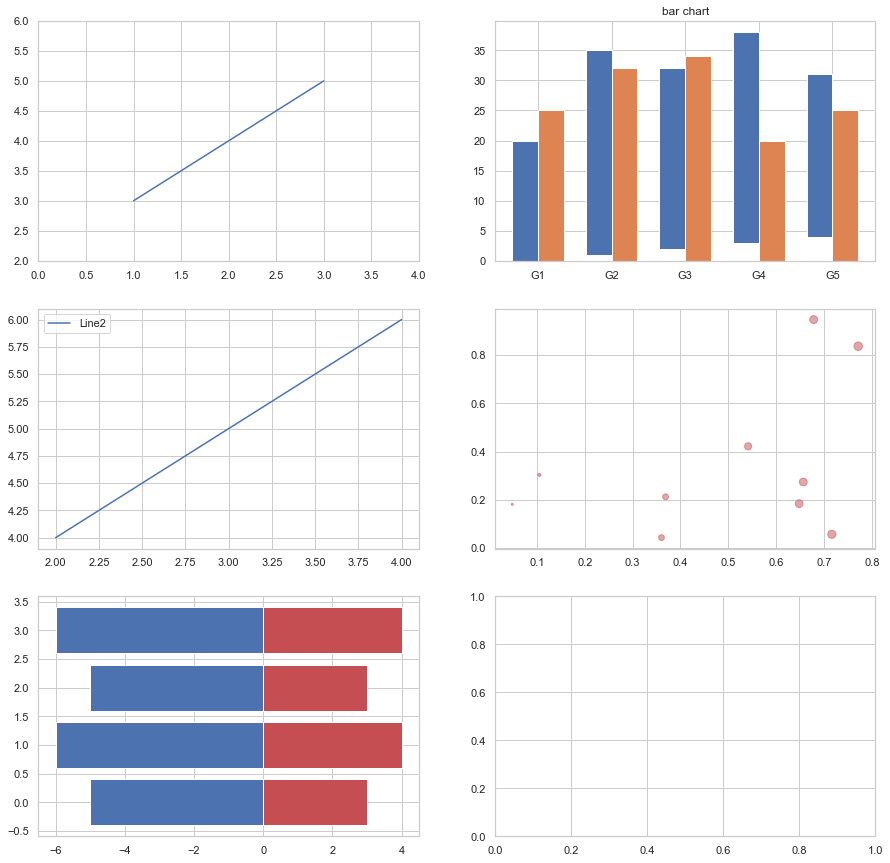

In [126]:
# 한번에 fig, ax 관리하려면 subplots 함수
fig, ax = plt.subplots(3,2,figsize=(15,15))

ax[0][0].plot([1,2,3],[3,4,5])
ax[0][0].axis([0,4,2,6])
ax[1][0].plot([2,3,4],[4,5,6],label='Line2')
ax[1][0].legend()

# scatter 관리
x = np.random.rand(10, 1)
area = np.pi * x * 30
ax[1][1].scatter(x,np.random.rand(10, 1),s=area,c='r', alpha=0.5)

# bar chart 관리
labels = ['G1','G2','G3','G4','G5']
men_means = [20,34,30,35,27]
women_means = [25,32,34,20,25]
width = 0.35
x = np.arange(len(labels))

ax[0][1].bar(x-width/2, men_means, width, bottom=np.arange(len(labels)))
ax[0][1].bar(x+width/2, women_means, width, label='Women')
ax[0][1].set_title('bar chart')

ax[0][1].set_xticks(x)
ax[0][1].set_xticklabels(labels)

# 가로 bar chart 관리
x = np.arange(4)
women = np.array([3,4,3,4])
men = np.array([5,6,5,6])
ax[2][0].barh(x, women, color='r')
ax[2][0].barh(x, -men, color='b')
plt.show()

## 3. Seaborn
- pandas에서 table을 가져와서 사용하기 쉽다.

In [131]:
import seaborn as sns

In [132]:
import dateutil
df = pd.read_csv('phone_data.csv')
df.columns

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

In [133]:
def parsedate(date_info):
    import datetime
    return date_info[:9]

In [134]:
df['day'] = df['date'].apply(parsedate)
df

,index,date,duration,item,month,network,network_type,day
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,15/10/14
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,15/10/14
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,15/10/14
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,15/10/14
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,15/10/14
...,...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world,13/03/15
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile,13/03/15
827,827,13/03/15 06:58,34.429,data,2015-03,data,data,13/03/15
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world,14/03/15


<AxesSubplot:xlabel='day', ylabel='duration'>

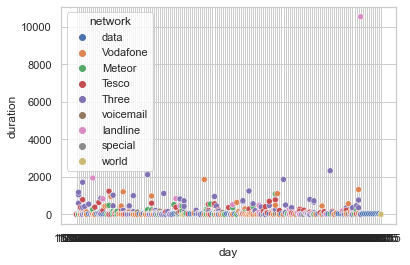

In [135]:
sns.scatterplot(data=df,x='day',y='duration',hue='network')

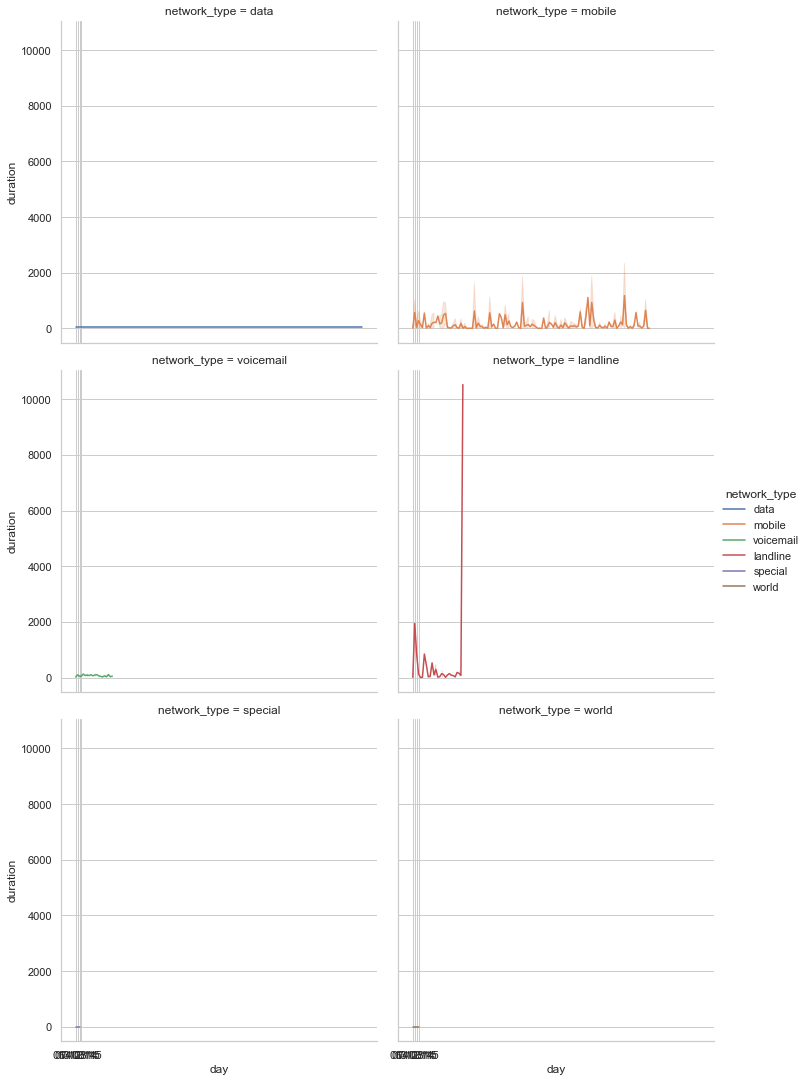

In [138]:
g = sns.relplot(data=df,x='day',y='duration',kind='line',hue='network_type',col='network_type',col_wrap=2)

In [139]:
penguins = sns.load_dataset('penguins')
tips = sns.load_dataset('tips')

In [140]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

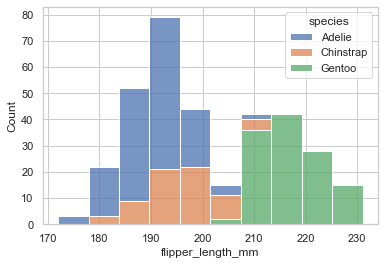

In [141]:
sns.histplot(data=penguins, x='flipper_length_mm',hue='species', multiple='stack')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

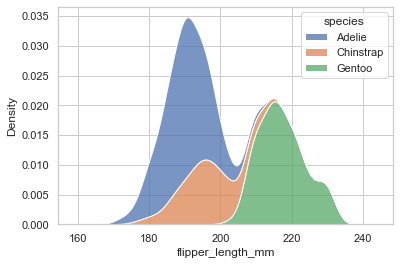

In [142]:
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

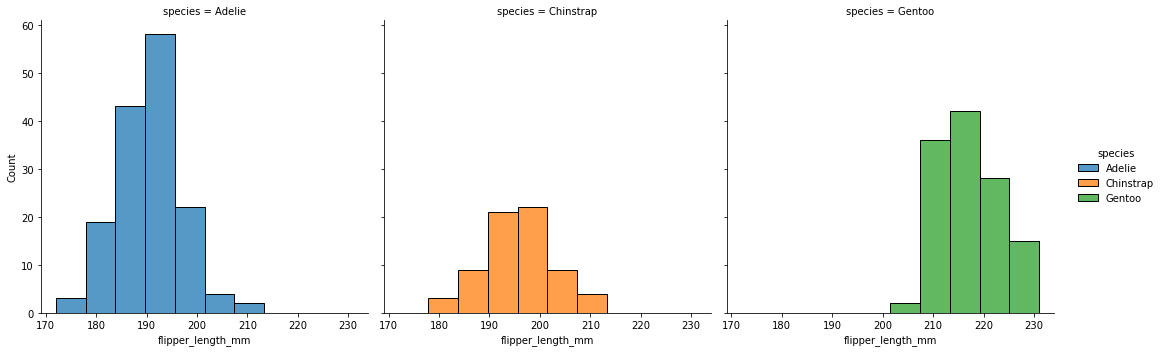

In [133]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species',col='species')

C:\Users\JCdata\miniconda3\lib\site-packages\seaborn\relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


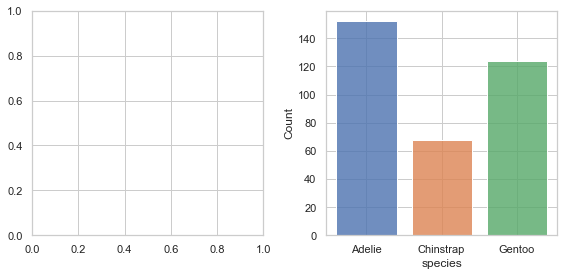

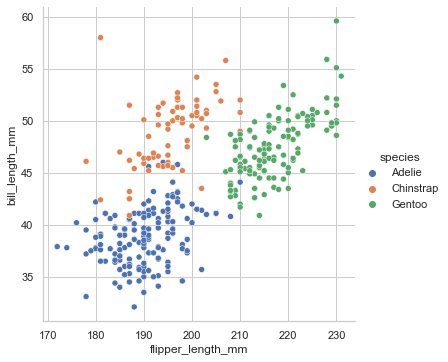

In [143]:
f, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

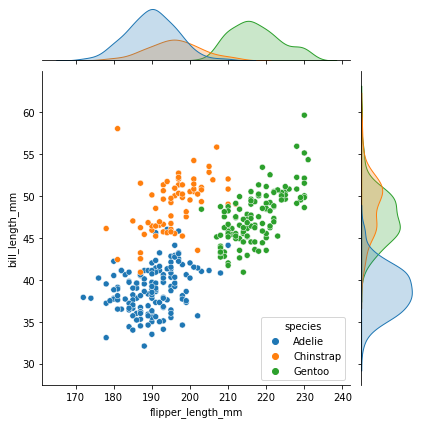

In [135]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [98]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


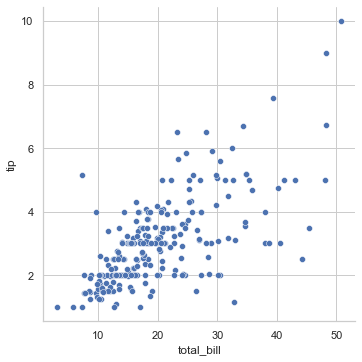

In [104]:
g = sns.relplot(data=tips, x="total_bill", y="tip")

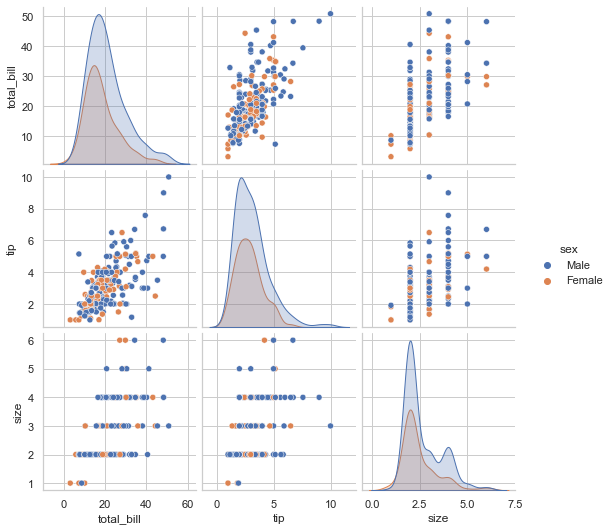

In [87]:
sns.pairplot(data=tips, hue="sex")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

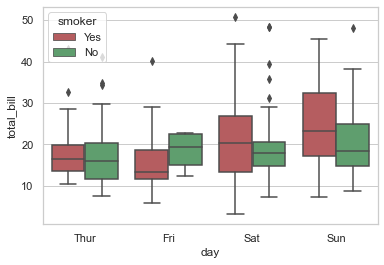

In [109]:
sns.boxplot(data=tips, x="day", y="total_bill",
            hue="smoker", palette=["r", "g"])

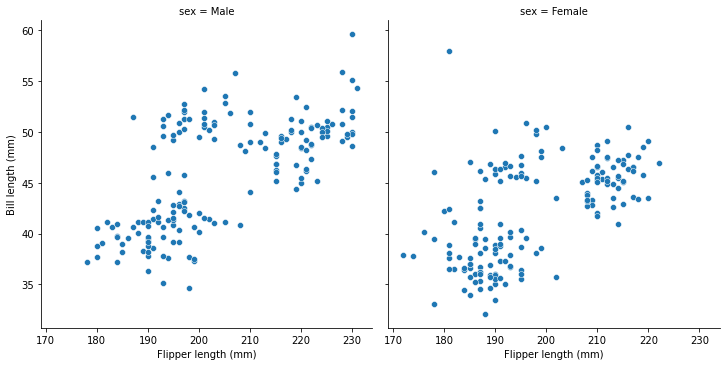

In [53]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")


In [120]:
df = sns.load_dataset('anscombe')
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


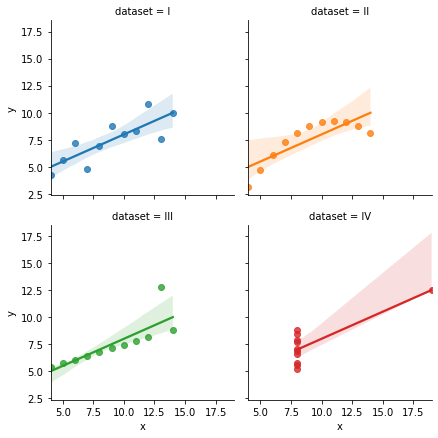

In [126]:
sns.lmplot(data=df, x='x',y='y',hue='dataset',col='dataset',col_wrap=2)

In [111]:
diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='carat', ylabel='price'>

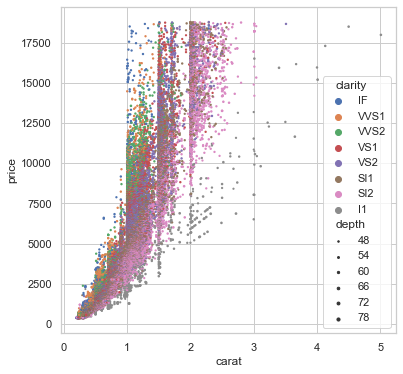

In [144]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=diamonds,x='carat',y='price',hue='clarity',size='depth',linewidth=0,sizes=(1,10))

In [21]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

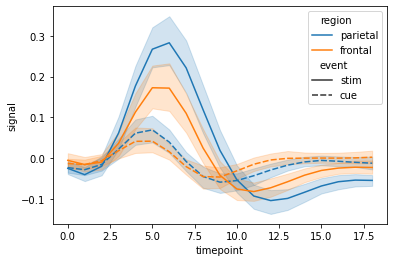

In [22]:
# Plot the responses for different events and regions
sns.lineplot(data=fmri,x="timepoint", y="signal",
             hue="region", style="event")

In [16]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


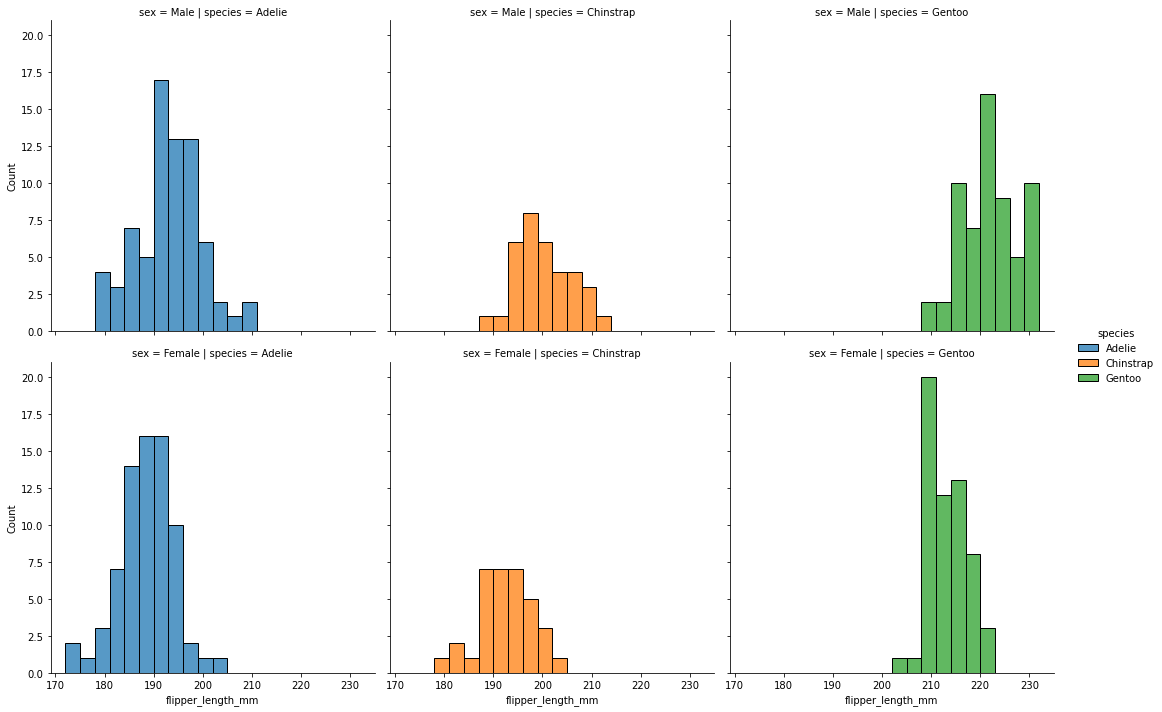

In [23]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species',col='species',row='sex',binwidth=3)

In [24]:
dots = sns.load_dataset("dots")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


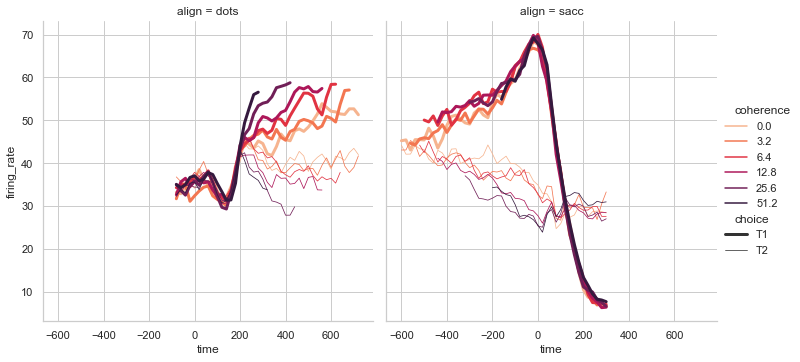

In [122]:
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5,
)

In [40]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


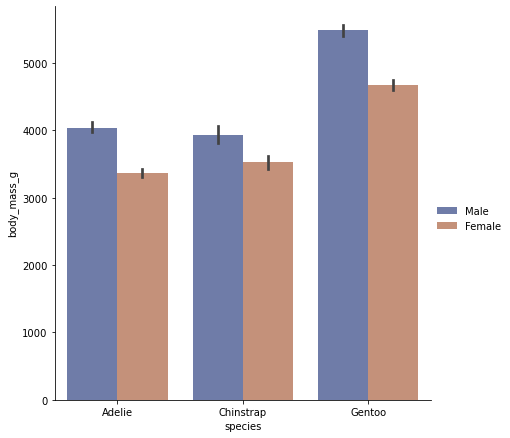

In [45]:
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    palette="dark", alpha=.6, height=6
)
g.legend.set_title("")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

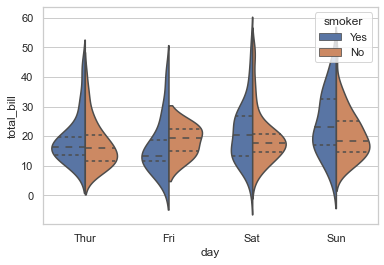

In [67]:
sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart")